In [1]:
import pandas as pd

In [2]:
ideal_data = pd.read_csv('ideal.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print("Ideal Data:")
print(ideal_data.head())
print("\nTrain Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Ideal Data:
      x        y1        y2        y3        y4        y5        y6        y7  \
0 -20.0 -0.912945  0.408082  9.087055  5.408082 -9.087055  0.912945 -0.839071   
1 -19.9 -0.867644  0.497186  9.132356  5.497186 -9.132356  0.867644 -0.865213   
2 -19.8 -0.813674  0.581322  9.186326  5.581322 -9.186326  0.813674 -0.889191   
3 -19.7 -0.751573  0.659649  9.248426  5.659649 -9.248426  0.751573 -0.910947   
4 -19.6 -0.681964  0.731386  9.318036  5.731386 -9.318036  0.681964 -0.930426   

         y8        y9  ...        y41        y42       y43       y44  \
0 -0.850919  0.816164  ... -40.456474  40.204040  2.995732 -0.008333   
1  0.168518  0.994372  ... -40.233820  40.048590  2.990720 -0.008340   
2  0.612391  1.162644  ... -40.006836  39.890660  2.985682 -0.008347   
3 -0.994669  1.319299  ... -39.775787  39.729824  2.980619 -0.008354   
4  0.774356  1.462772  ... -39.540980  39.565693  2.975530 -0.008361   

         y45       y46       y47       y48       y49       y50  
0  

In [4]:
import numpy as np

In [5]:
def find_best_fit_functions(train_data, ideal_data):
    best_fit_functions = {}
    for train_col in train_data.columns[1:]:
        min_deviation = float('inf')
        best_fit = None
        for ideal_col in ideal_data.columns[1:]:
            deviation = np.sum((train_data[train_col] - ideal_data[ideal_col]) ** 2)
            if deviation < min_deviation:
                min_deviation = deviation
                best_fit = ideal_col
        best_fit_functions[train_col] = best_fit
    return best_fit_functions

In [6]:
best_fit_functions = find_best_fit_functions(train_data, ideal_data)
print("Best Fit Functions:")
print(best_fit_functions)

Best Fit Functions:
{'y1': 'y42', 'y2': 'y41', 'y3': 'y11', 'y4': 'y48'}


In [7]:
deviation_thresholds = {}
for train_col in train_data.columns[1:]:
    ideal_col = best_fit_functions[train_col]
    max_deviation = np.max(np.abs(train_data[train_col] - ideal_data[ideal_col]))
    deviation_thresholds[train_col] = max_deviation * np.sqrt(2)

In [8]:
def map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds):
    test_data['assigned_function'] = None
    test_data['deviation'] = None
    for i, row in test_data.iterrows():
        x = row['x']
        y = row['y']
        for train_col, ideal_col in best_fit_functions.items():
            ideal_y = ideal_data.loc[ideal_data['x'] == x, ideal_col].values[0]
            deviation = np.abs(y - ideal_y)
            if deviation <= deviation_thresholds[train_col]:
                test_data.at[i, 'assigned_function'] = ideal_col
                test_data.at[i, 'deviation'] = deviation
                break
    return test_data

In [9]:
mapped_test_data = map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds)
print("Mapped Test Data:")
print(mapped_test_data)

Mapped Test Data:
       x          y assigned_function deviation
0   17.5  34.161040               y41  0.351148
1    0.3   1.215102               y41  0.467342
2   -8.7 -16.843908              None      None
3  -19.2 -37.170870              None      None
4  -11.0 -20.263054              None      None
..   ...        ...               ...       ...
95  -1.9  -4.036904               y41  0.236246
96  12.2  -0.010358               y48  0.156869
97  16.5 -33.964134               y42  0.612934
98   5.3 -10.291622               y42  0.031191
99  17.9  28.078455              None      None

[100 rows x 4 columns]


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

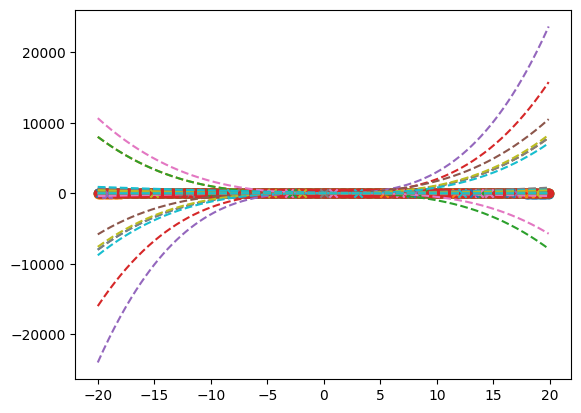

In [12]:
for ideal_col in ideal_data.columns[1:]:
    plt.plot(ideal_data['x'], ideal_data[ideal_col], label=f'Ideal {ideal_col}', linestyle='dashed')

# Plot training data
for train_col in train_data.columns[1:]:
    plt.scatter(train_data['x'], train_data[train_col], label=f'Train {train_col}')

# Plot test data assignments
for i, row in mapped_test_data.iterrows():
    if pd.notnull(row['assigned_function']):
        plt.scatter(row['x'], row['y'], label=f'Test Assigned {row["assigned_function"]}', marker='x')

In [14]:
import unittest

In [15]:
class TestIdealFunctions(unittest.TestCase):
    def test_find_best_fit_functions(self):
        best_fit_functions = find_best_fit_functions(train_data, ideal_data)
        self.assertEqual(len(best_fit_functions), 4)

    def test_map_test_data(self):
        mapped_test_data = map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds)
        self.assertIn('assigned_function', mapped_test_data.columns)
        self.assertIn('deviation', mapped_test_data.columns)

In [16]:
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.171s

OK


In [17]:
from sqlalchemy import create_engine, Column, Integer, Float, String, MetaData, Table
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker


In [18]:
Base = declarative_base()

<ipython-input-18-9bae6e3862ba>:1: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [19]:
class TrainingData(Base):
    __tablename__ = 'training_data'
    id = Column(Integer, primary_key=True)
    x = Column(Float)
    y1 = Column(Float)
    y2 = Column(Float)
    y3 = Column(Float)
    y4 = Column(Float)

In [20]:
class IdealFunctions(Base):
    __tablename__ = 'ideal_functions'
    id = Column(Integer, primary_key=True)
    x = Column(Float)
    y1 = Column(Float)
    y2 = Column(Float)
    # Add columns up to y50
    # ...
    y50 = Column(Float)


In [21]:
class TestData(Base):
    __tablename__ = 'test_data'
    id = Column(Integer, primary_key=True)
    x = Column(Float)
    y = Column(Float)
    delta_y = Column(Float)
    ideal_function = Column(String)

In [22]:
engine = create_engine('sqlite:///functions.db')
Base.metadata.create_all(engine)

# Creating a session
Session = sessionmaker(bind=engine)
session = Session()

# Loading training data into the database
train_data.to_sql('training_data', engine, if_exists='replace', index=False)

# Loading ideal functions into the database
ideal_data.to_sql('ideal_functions', engine, if_exists='replace', index=False)

400

In [24]:
deviation_thresholds = {}
for train_col in train_data.columns[1:]:
    ideal_col = best_fit_functions[train_col]
    max_deviation = np.max(np.abs(train_data[train_col] - ideal_data[ideal_col]))
    deviation_thresholds[train_col] = max_deviation * np.sqrt(2)


In [25]:
def map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds):
    mapped_test_data = []
    for i, row in test_data.iterrows():
        x = row['x']
        y = row['y']
        for train_col, ideal_col in best_fit_functions.items():
            ideal_y = ideal_data.loc[ideal_data['x'] == x, ideal_col].values[0]
            deviation = np.abs(y - ideal_y)
            if deviation <= deviation_thresholds[train_col]:
                mapped_test_data.append((x, y, deviation, ideal_col))
                break
    return mapped_test_data

In [26]:
mapped_test_data = map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds)

In [27]:
mapped_test_df = pd.DataFrame(mapped_test_data, columns=['x', 'y', 'delta_y', 'ideal_function'])
mapped_test_df.to_sql('test_data', engine, if_exists='replace', index=False)
print(mapped_test_df)

               x          y   delta_y ideal_function
0   1.750000e+01  34.161040  0.351148            y41
1   3.000000e-01   1.215102  0.467342            y41
2   8.000000e-01   1.426456  0.532222            y41
3   1.400000e+01  -0.066506  0.134233            y48
4  -1.500000e+01  -0.205363  0.452371            y48
5   5.800000e+00  10.711373  0.656326            y41
6  -1.980000e+01 -19.915014  0.115014            y11
7   1.890000e+01  19.193245  0.293245            y11
8   8.800000e+00  -0.726051  0.488840            y48
9  -9.500000e+00  -9.652251  0.152251            y11
10  8.100000e+00 -16.659458  0.337686            y42
11 -8.800000e+00  16.571745  0.622709            y42
12 -3.100000e+00  -2.770136  0.329864            y11
13 -1.180000e+01  24.606413  0.646196            y42
14  1.880000e+01  37.523400  0.051833            y41
15  7.700000e+00  15.392297  0.501787            y41
16 -2.800000e+00  -3.298999  0.498999            y11
17 -8.200000e+00 -16.575344  0.295021         

In [28]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource


In [29]:
output_notebook()

In [30]:
train_source = ColumnDataSource(train_data)
ideal_source = ColumnDataSource(ideal_data)
test_source = ColumnDataSource(mapped_test_df)

In [31]:
p = figure(title="Training Data, Ideal Functions, and Test Data Assignments", x_axis_label='x', y_axis_label='y')

In [32]:
for col in train_data.columns[1:]:
    p.scatter('x', col, source=train_source, legend_label=f'Train {col}')

# Plot ideal functions
for col in ideal_data.columns[1:]:
    p.line('x', col, source=ideal_source, legend_label=f'Ideal {col}', line_dash='dashed')

# Plot test data assignments
p.scatter('x', 'y', source=test_source, legend_label='Test Data', color='red', marker='x')

show(p)

In [34]:
class TestIdealFunctions(unittest.TestCase):
    def test_find_best_fit_functions(self):
        best_fit_functions = find_best_fit_functions(train_data, ideal_data)
        self.assertEqual(len(best_fit_functions), 4)

    def test_map_test_data(self):
        mapped_test_data = map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds)
        self.assertIn('assigned_function', mapped_test_data.columns)
        self.assertIn('deviation', mapped_test_data.columns)


In [36]:
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.E
ERROR: test_map_test_data (__main__.TestIdealFunctions)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-34-0a8cd45bfa6e>", line 8, in test_map_test_data
    self.assertIn('assigned_function', mapped_test_data.columns)
AttributeError: 'list' object has no attribute 'columns'

----------------------------------------------------------------------
Ran 2 tests in 0.428s

FAILED (errors=1)


In [37]:
class DataProcessingError(Exception):
    """Custom exception for data processing errors."""
    pass

def load_data(file_path):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        raise DataProcessingError(f"File not found: {file_path}")
    except pd.errors.EmptyDataError:
        raise DataProcessingError(f"No data: {file_path}")

In [42]:
def main():
    try:
        ideal_data = load_data('ideal.csv')
        train_data = load_data('train.csv')
        test_data = load_data('test.csv')

        best_fit_functions = find_best_fit_functions(train_data, ideal_data)
        mapped_test_data = map_test_data(test_data, ideal_data, best_fit_functions, deviation_thresholds)

        # Save to database
        train_data.to_sql('training_data', engine, if_exists='replace', index=False)
        ideal_data.to_sql('ideal_functions', engine, if_exists='replace', index=False)
        mapped_test_df = pd.DataFrame(mapped_test_data, columns=['x', 'y', 'delta_y', 'ideal_function'])
        mapped_test_df.to_sql('test_data', engine, if_exists='replace', index=False)

        # Visualize the data
        visualize_data(train_data, ideal_data, mapped_test_df)

    except DataProcessingError as e:
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


In [43]:
if __name__ == '__main__':
    main()

An unexpected error occurred: name 'visualize_data' is not defined


In [45]:
import subprocess

In [47]:
repository_url = "<repository_url>"
repository_name = "<repository_name>"
feature_branch = "feature/new_function"
commit_message = "Add new function to improve feature X"

def run_git_command(command):
    """Run a Git command and print the output."""
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode == 0:
        print(stdout.decode('utf-8'))
    else:
        print(stderr.decode('utf-8'))

run_git_command(f"git clone {repository_url}")
run_git_command(f"cd {repository_name} && git checkout develop")

run_git_command(f"cd {repository_name} && git checkout -b {feature_branch}")



run_git_command(f"cd {repository_name} && git add .")
run_git_command(f"cd {repository_name} && git commit -m \"{commit_message}\"")

run_git_command(f"cd {repository_name} && git push origin {feature_branch}")

print("Now, go to my repository on the Git hosting service (e.g., GitHub) to create a pull request from your 'feature/new_function' branch into the 'develop' branch.")

/bin/sh: 1: Syntax error: end of file unexpected

/bin/sh: 1: Syntax error: "&&" unexpected

/bin/sh: 1: Syntax error: "&&" unexpected

/bin/sh: 1: Syntax error: "&&" unexpected

/bin/sh: 1: Syntax error: "&&" unexpected

/bin/sh: 1: Syntax error: "&&" unexpected

Now, go to my repository on the Git hosting service (e.g., GitHub) to create a pull request from your 'feature/new_function' branch into the 'develop' branch.
